### Авторегрессионная модель первого порядка

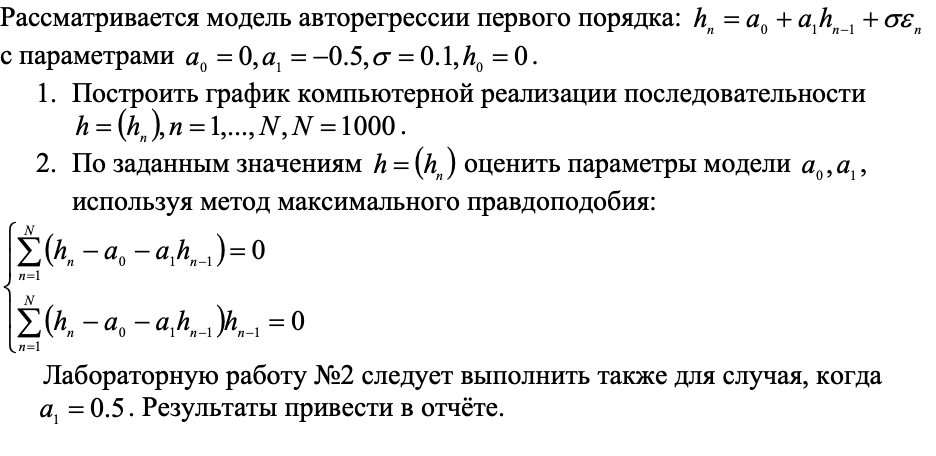

In [26]:
import numpy as np
import sympy as sp
import statistics
from matplotlib import pyplot as plt

In [27]:
def plots_proba(sample_generate, color, title, bins):
    fig, axes = plt.subplots(1, figsize=(5, 5), dpi=100)
    fig.suptitle(title)

    axes = plt.hist(sample_generate, color= color, edgecolor = 'black', bins = int(bins))

def make_autoregress(a0, a1, h0, sigma, count_items):
    eps = statistics.NormalDist(0, 1).samples(count_items, seed=3320)
    
    h_prev = h0
    history_h = [h0]

    for i in range(count_items):
        h_curr = a0 + a1*h_prev + sigma*eps[i]
        history_h.append(h_curr)
        h_prev = h_curr

    return history_h
        

# Эксперимент 1
 - a0 = 0, 
 - a1 = -0.5,
 - sigma = 0.1,
 - ount_items = 1000

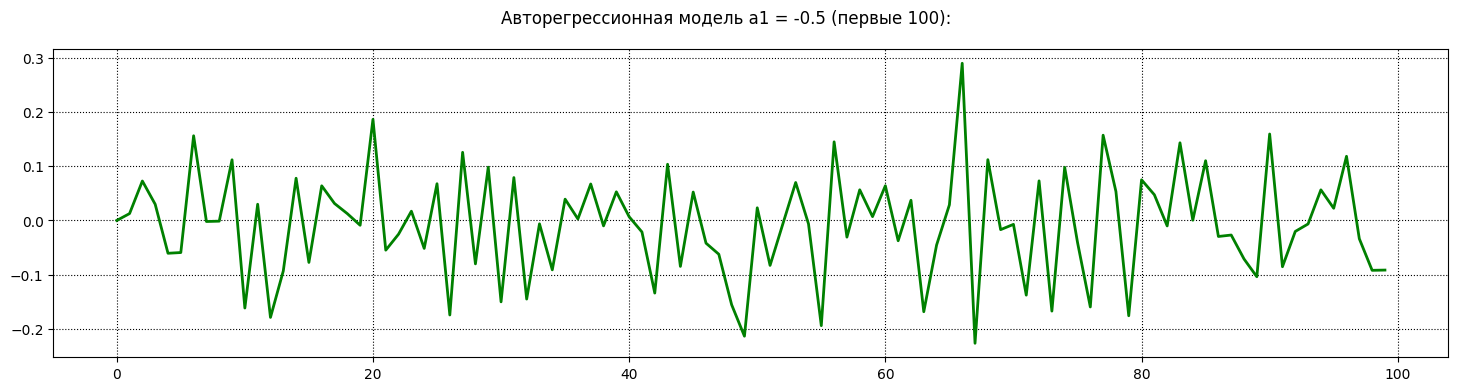

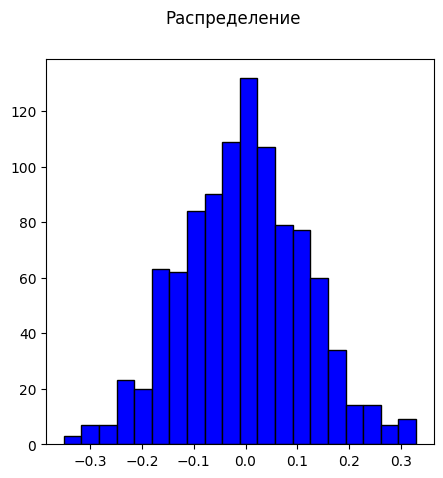

In [28]:
h_itemes = make_autoregress(a0 = 0, 
                            a1 = -0.5, 
                            h0 = 0, 
                            sigma = 0.1, 
                            count_items = 1000)



fig, axes = plt.subplots(1, figsize=(18, 4), dpi=100)

fig.suptitle('Авторегрессионная модель a1 = -0.5 (первые 100): ')
f1 = axes.plot([i for i in range(100)], h_itemes[:100], color='green',linewidth = 2)
axes.grid(color = 'k', linestyle = ':')
plots_proba(h_itemes, 'blue', 'Распределение', 20)

### Оценим параметры модели

In [29]:
sa0 = sp.Symbol("a0")
sa1 = sp.Symbol("a1")

f1 = sum([h_itemes[n] - sa0 - sa1 * h_itemes[n-1] for n in range(1, 1000)])
f2 = sum([(h_itemes[n] - sa0 - sa1 * h_itemes[n-1]) * h_itemes[n-1] for n in range(1, 1000)])
solution = sp.solve((f1, f2), (sa0, sa1))

b, c = round(solution[sa0], 8), round(solution[sa1], 8)

print('a0 =', solution[sa0])
print('a1 =', solution[sa1])

pred_a0 = solution[sa0]
pred_a1 = solution[sa1]

a0 = -0.00679375231276450
a1 = -0.518901622425486


### Строим модель предсказаний

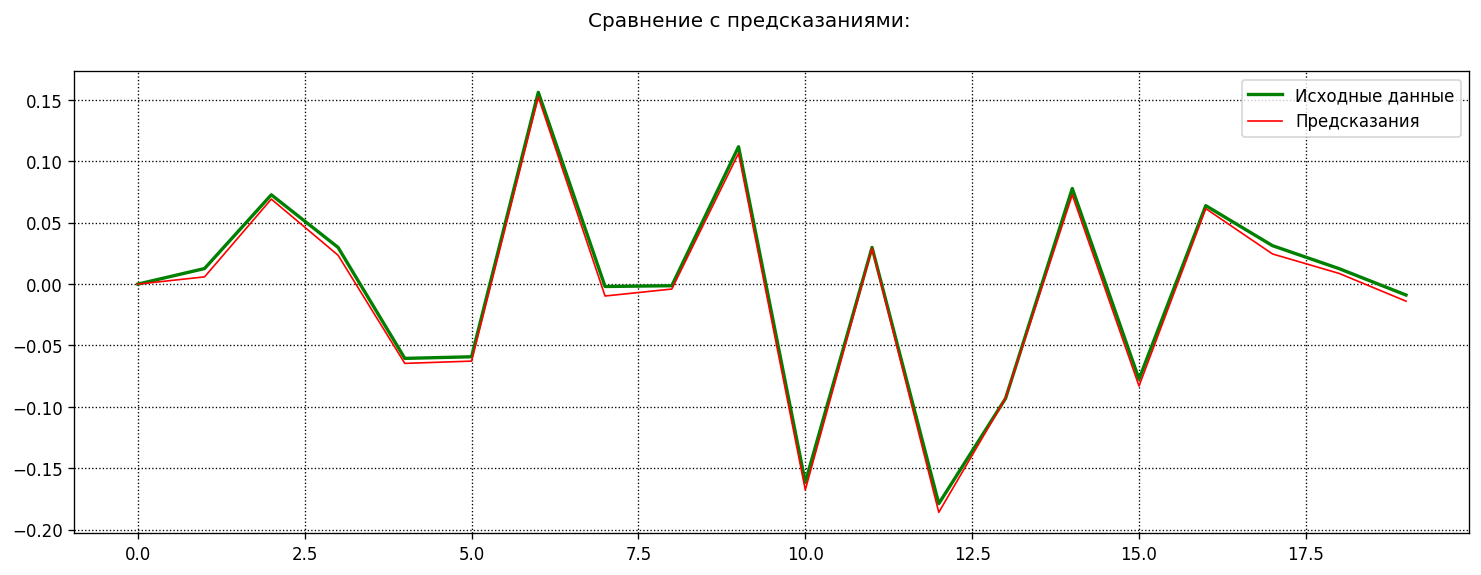

In [30]:
h_predicts = make_autoregress(a0 = pred_a0, 
                            a1 = pred_a1, 
                            h0 = 0, 
                            sigma = 0.1, 
                            count_items = 1000)


fig, axes = plt.subplots(1, figsize=(15, 5), dpi=120)
fig.suptitle('Сравнение с предсказаниями:')
f1 = axes.plot([i for i in range(20)], h_itemes[:20], color='green', linewidth = 2, label ="Исходные данные")
f1 = axes.plot([i for i in range(20)], h_predicts[:20], color='red', linewidth = 1, label ="Предсказания")
plt.legend()
axes.grid(color = 'k', linestyle = ':')

# Эксперимент 2
 - a0 = 0, 
 - a1 = 0.5,
 - sigma = 0.1,
 - ount_items = 1000

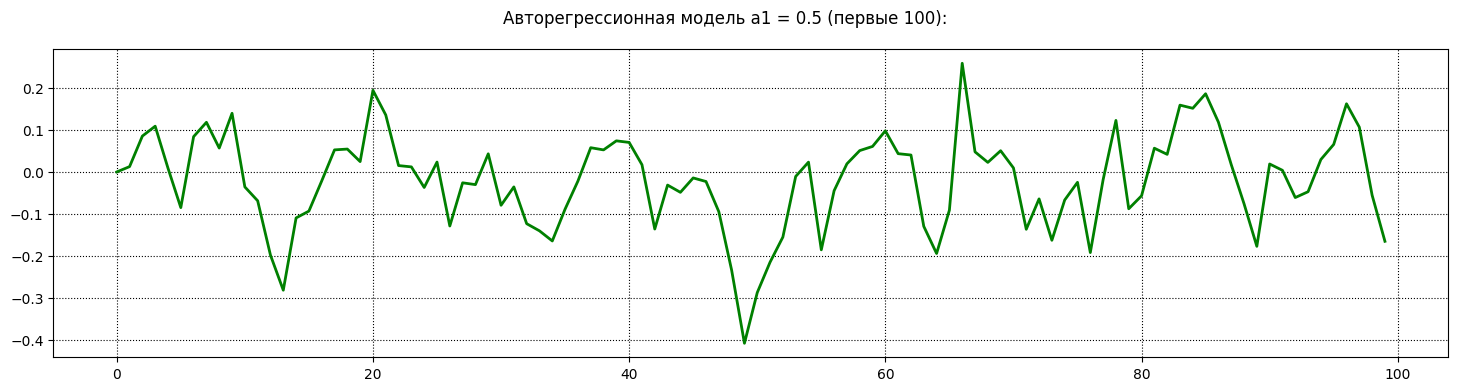

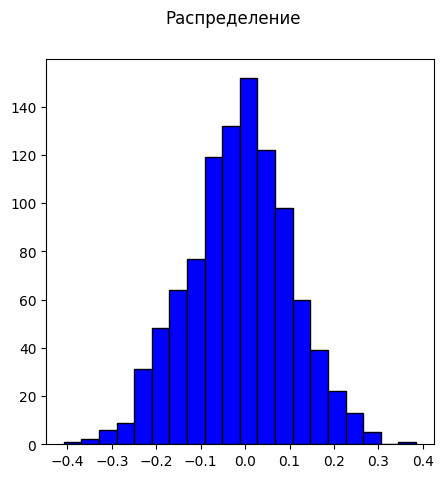

In [31]:
h_itemes = make_autoregress(a0 = 0, 
                            a1 = 0.5, 
                            h0 = 0, 
                            sigma = 0.1, 
                            count_items = 1000)


fig, axes = plt.subplots(1, figsize=(18, 4), dpi=100)

fig.suptitle('Авторегрессионная модель a1 = 0.5 (первые 100): ')
f1 = axes.plot([i for i in range(100)], h_itemes[:100], color='green',linewidth = 2)
axes.grid(color = 'k', linestyle = ':')

plots_proba(h_itemes, 'blue', 'Распределение', 20)

### Оценим параметры модели

In [32]:
sa0 = sp.Symbol("a0")
sa1 = sp.Symbol("a1")

f1 = sum([h_itemes[n] - sa0 - sa1 * h_itemes[n-1] for n in range(1, 1000)])
f2 = sum([(h_itemes[n] - sa0 - sa1 * h_itemes[n-1]) * h_itemes[n-1] for n in range(1, 1000)])
solution = sp.solve((f1, f2), (sa0, sa1))

b, c = round(solution[sa0], 8), round(solution[sa1], 8)

print('a0 =', solution[sa0])
print('a1 =', solution[sa1])

pred_a0 = solution[sa0]
pred_a1 = solution[sa1]

a0 = -0.00704450292901052
a1 = 0.474929654029315


### Строим модель предсказаний

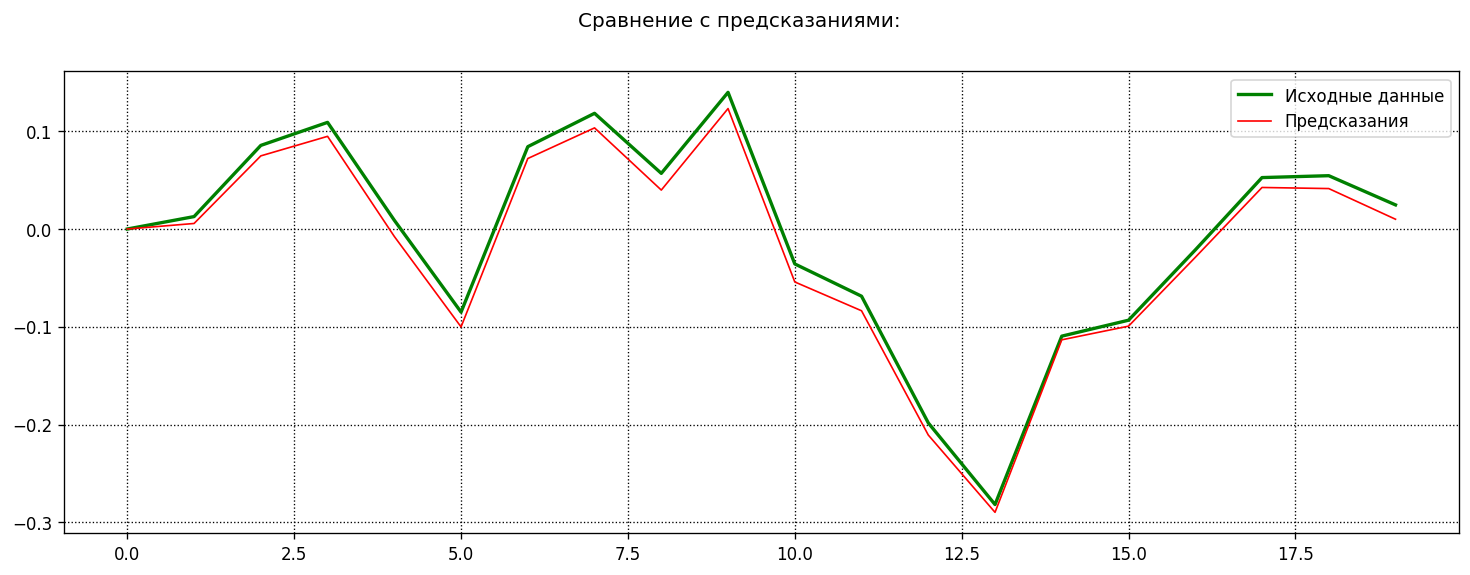

In [33]:
h_predicts = make_autoregress(a0 = pred_a0, 
                            a1 = pred_a1, 
                            h0 = 0, 
                            sigma = 0.1, 
                            count_items = 1000)


fig, axes = plt.subplots(1, figsize=(15, 5), dpi=120)
fig.suptitle('Сравнение с предсказаниями:')
f1 = axes.plot([i for i in range(20)], h_itemes[:20], color='green', linewidth = 2, label ="Исходные данные")
f1 = axes.plot([i for i in range(20)], h_predicts[:20], color='red', linewidth = 1, label ="Предсказания")
plt.legend()
axes.grid(color = 'k', linestyle = ':')